In [1]:
# Importing required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_corr=df.corr()['target'][:-1]
feature_list=df_corr[abs(df_corr)>0.1].sort_values(ascending=False)
feature_list

cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape

(1025, 14)

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm again
df.duplicated().sum()


np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


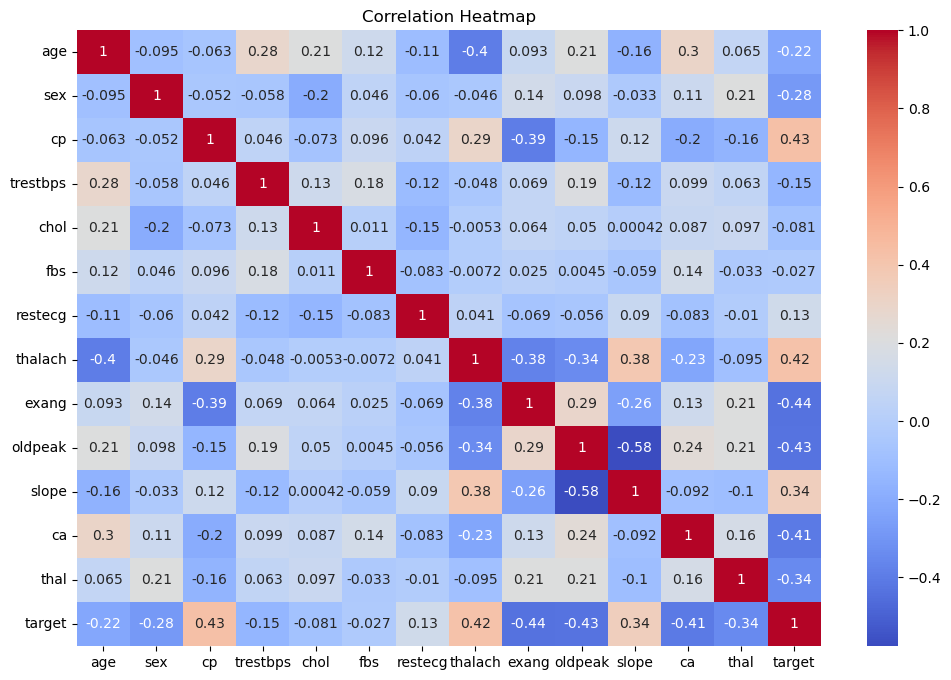

In [11]:
#Correleation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
#Feature Engineering(duplicate values)
# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)
df_encoded.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,False,False,False,False,False,True,False,True
1,53,1,140,203,1,0,155,1,3.1,0,0,False,False,False,False,False,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,0,False,False,False,False,False,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,0,False,False,False,False,False,True,False,True
4,62,0,138,294,1,1,106,0,1.9,3,0,False,False,False,False,True,False,True,False


In [13]:
#Train test split and scalling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target split
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Model training and prediction
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        48
           1       0.75      0.88      0.81        43

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

Accuracy: 0.8021978021978022


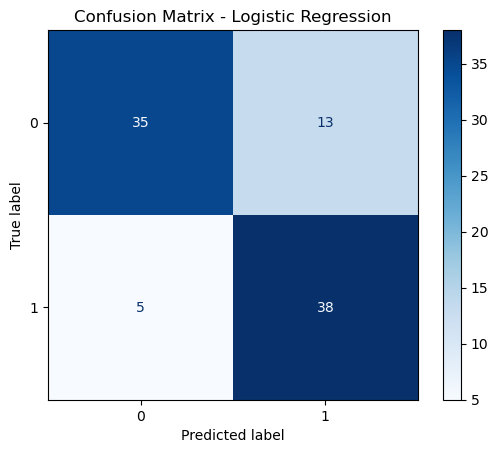

In [22]:
#Matrix Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Plot confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [15]:
#Support vector Machine
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Report")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Report
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        48
           1       0.75      0.88      0.81        43

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

Accuracy: 0.8021978021978022


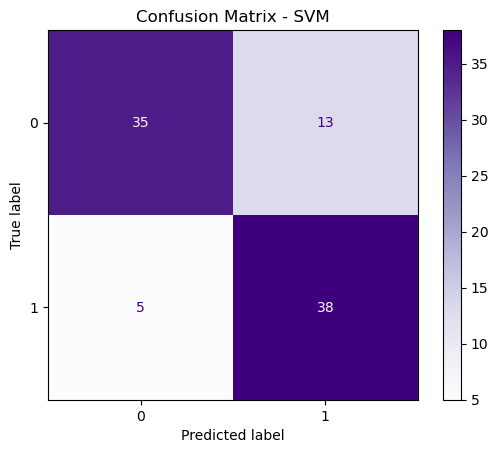

In [23]:
#SVM Matrix
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.show()


In [16]:
#K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Report")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Report
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        48
           1       0.73      0.88      0.80        43

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91

Accuracy: 0.7912087912087912


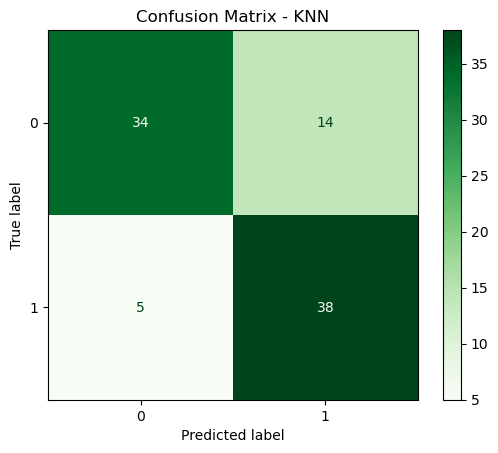

In [24]:
#KNN Matrix
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.show()


In [17]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Report")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Report
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        48
           1       0.70      0.88      0.78        43

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91

Accuracy: 0.7692307692307693


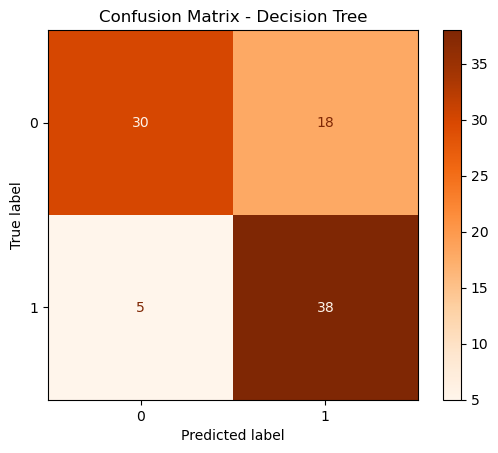

In [25]:
#Decision tree Matrix
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [18]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Report
              precision    recall  f1-score   support

           0       0.89      0.69      0.78        48
           1       0.72      0.91      0.80        43

    accuracy                           0.79        91
   macro avg       0.81      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91

Accuracy: 0.7912087912087912


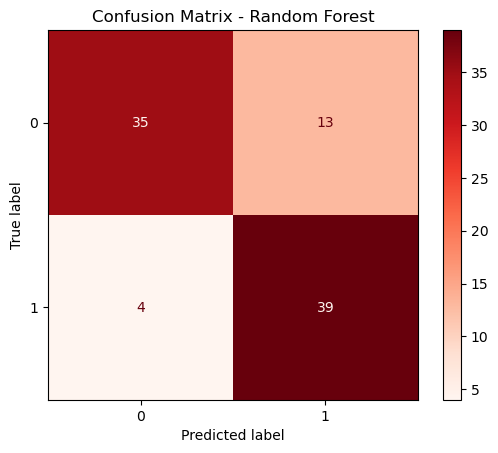

In [26]:
#Random Forest Matrix
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Reds')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [28]:
#First: Import All Required Metrics
from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)


In [29]:
#Define a Function for Evaluation and Plotting
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    ap = average_precision_score(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    
    print(f"📌 {name} Metrics:")
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Average Precision Score: {ap:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print("-" * 40)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})', color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        "Model": name,
        "Accuracy": acc,
        "Average Precision": ap,
        "AUC": auc
    }


📌 Logistic Regression Metrics:
Accuracy Score: 0.8022
Average Precision Score: 0.8552
AUC Score: 0.8924
----------------------------------------


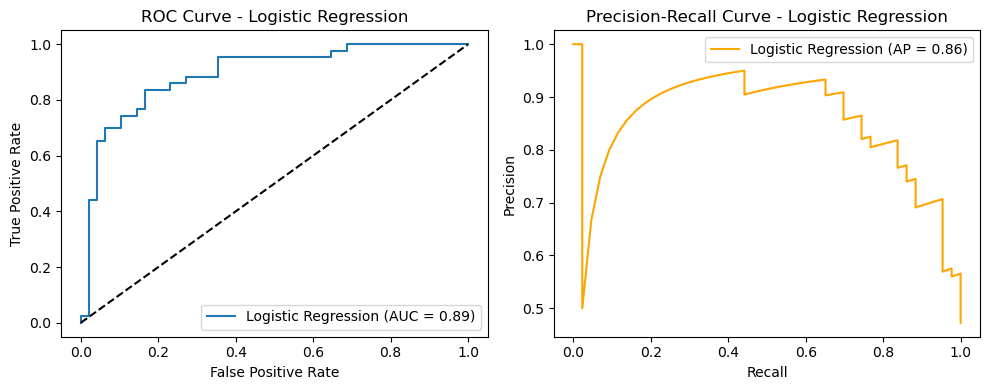

📌 SVM Metrics:
Accuracy Score: 0.8022
Average Precision Score: 0.8670
AUC Score: 0.9021
----------------------------------------


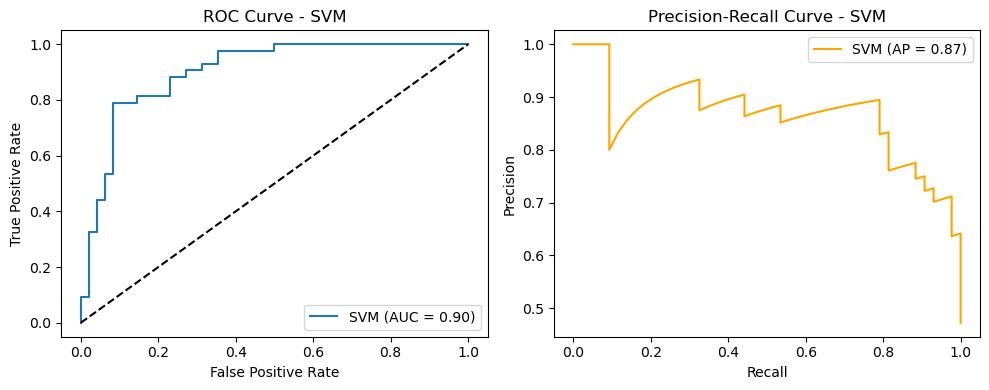

📌 KNN Metrics:
Accuracy Score: 0.7912
Average Precision Score: 0.8308
AUC Score: 0.8915
----------------------------------------


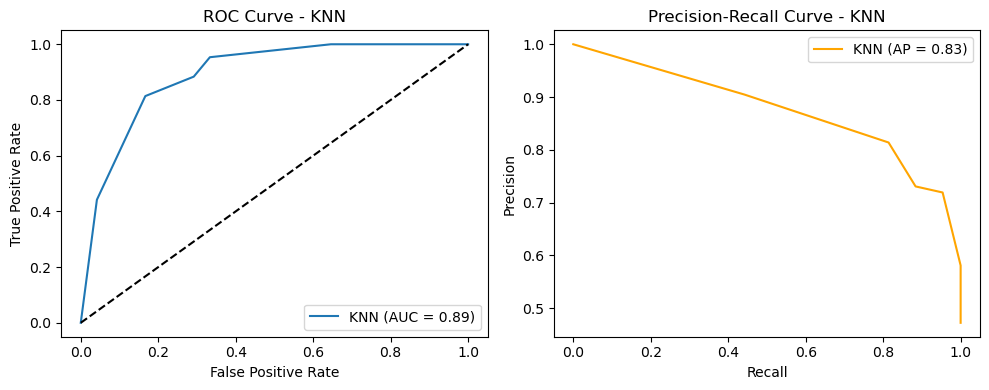

📌 Decision Tree Metrics:
Accuracy Score: 0.7473
Average Precision Score: 0.6546
AUC Score: 0.7544
----------------------------------------


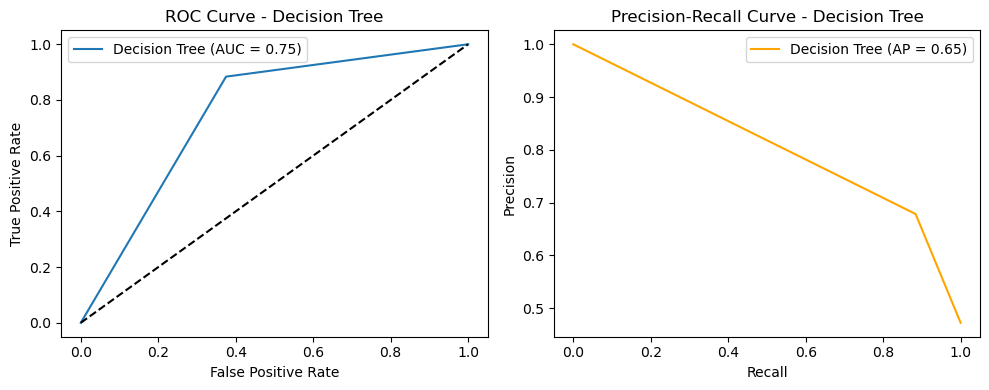

📌 Random Forest Metrics:
Accuracy Score: 0.8132
Average Precision Score: 0.8832
AUC Score: 0.9024
----------------------------------------


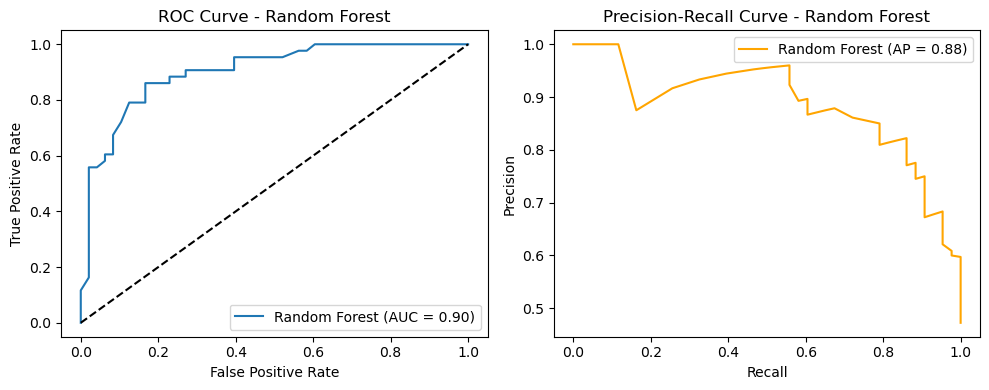

In [30]:
#Run Evaluations on All Models
results = []

results.append(evaluate_model("Logistic Regression", lr_model, X_test, y_test))
results.append(evaluate_model("SVM", svm_model, X_test, y_test))
results.append(evaluate_model("KNN", knn_model, X_test, y_test))
results.append(evaluate_model("Decision Tree", dt_model, X_test, y_test))
results.append(evaluate_model("Random Forest", rf_model, X_test, y_test))


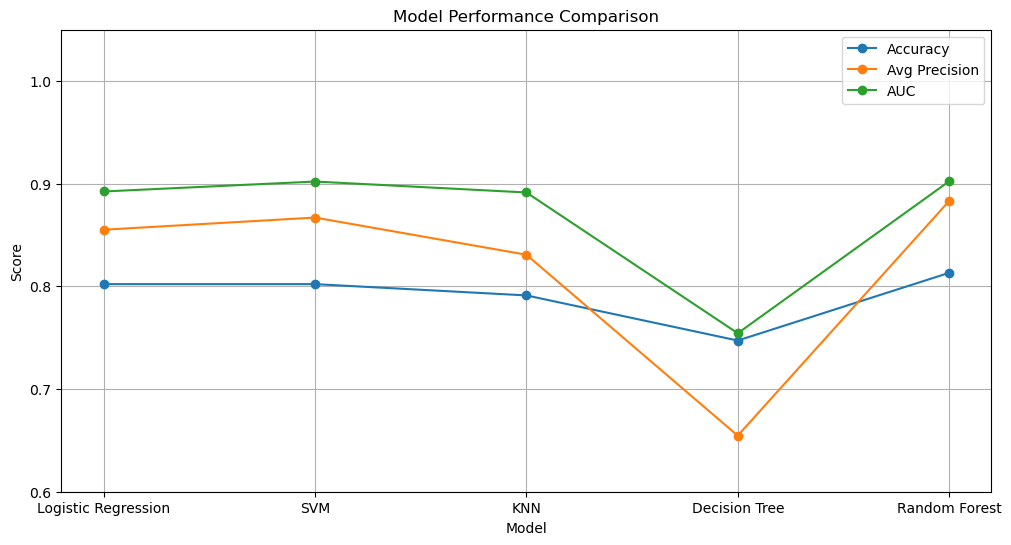

In [31]:
#Final: Plot Comparison of All Scores
results_df = pd.DataFrame(results)

# Line chart comparison
plt.figure(figsize=(12, 6))
plt.plot(results_df["Model"], results_df["Accuracy"], label="Accuracy", marker='o')
plt.plot(results_df["Model"], results_df["Average Precision"], label="Avg Precision", marker='o')
plt.plot(results_df["Model"], results_df["AUC"], label="AUC", marker='o')

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0.6, 1.05)
plt.legend()
plt.grid(True)
plt.show()


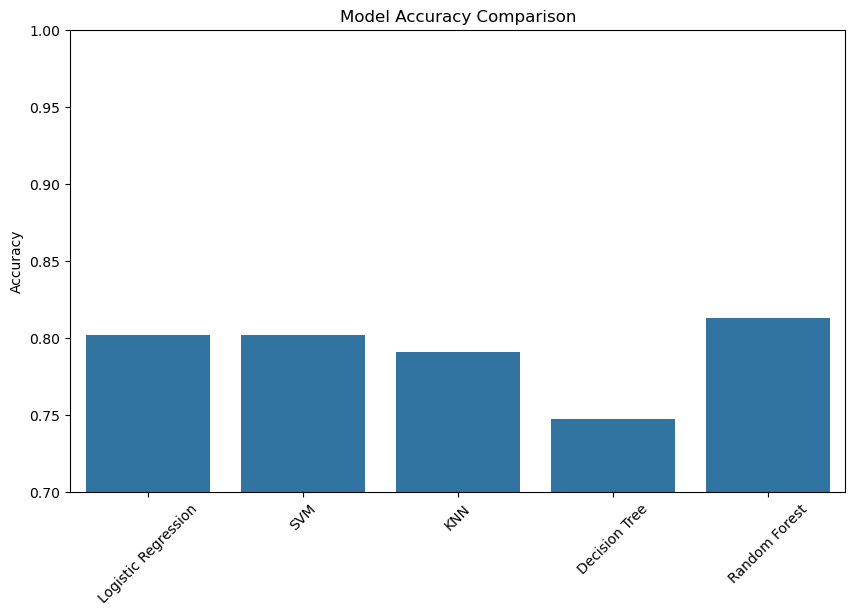

In [32]:
#Accuracy comparision
# Compare model accuracies
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0.7, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()
